In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv('../data/raw/credit_data.csv')


# Understand the data
df.info()
df.describe()
df.isnull().sum()

# Class balance
df['SeriousDlqin2yrs'].value_counts(normalize=True)


plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

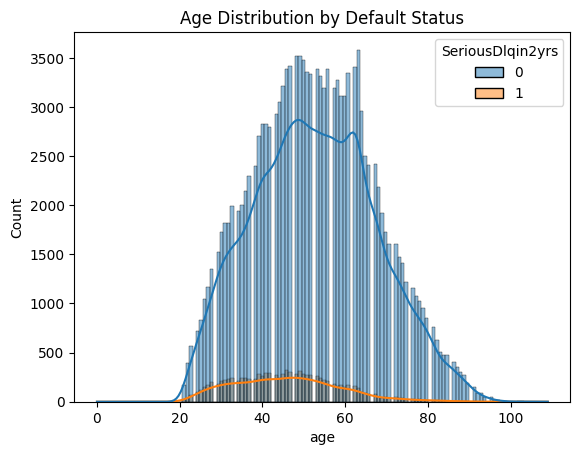

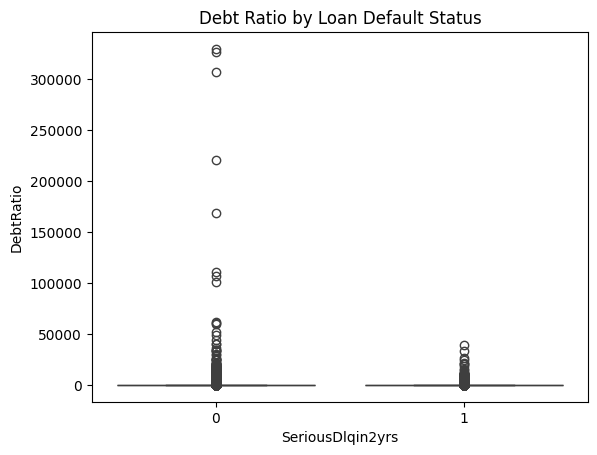

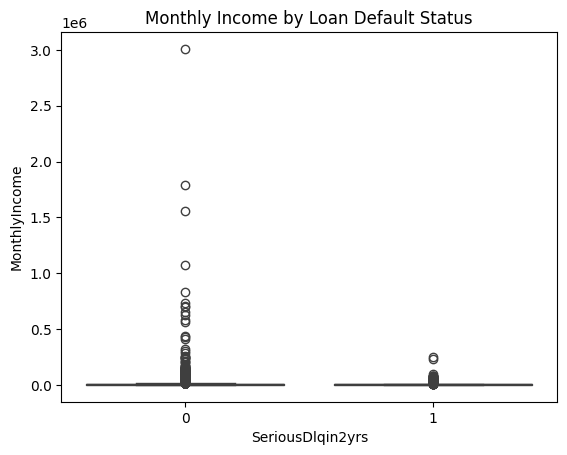

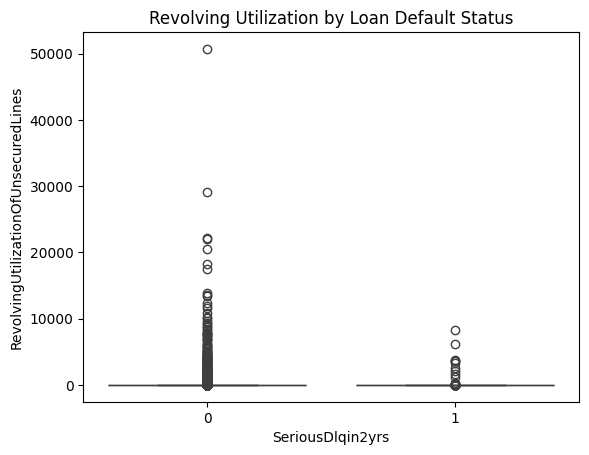

Text(0.5, 1.0, '30-59 Days Past Due by Loan Default Status')

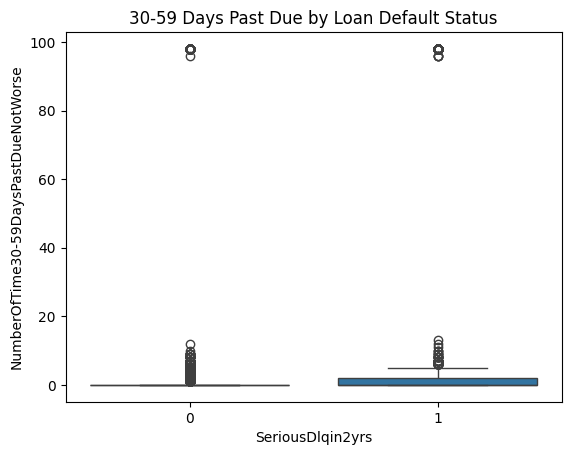

In [13]:
# Visualize key features
sns.histplot(data=df, x='age', hue='SeriousDlqin2yrs', kde=True)
plt.title('Age Distribution by Default Status')
plt.show()

sns.boxplot(data=df, x='SeriousDlqin2yrs', y='DebtRatio')
plt.title('Debt Ratio by Loan Default Status')
plt.show()

sns.boxplot(data=df, x='SeriousDlqin2yrs', y='MonthlyIncome')
plt.title('Monthly Income by Loan Default Status')
plt.show()

sns.boxplot(data=df, x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines')
plt.title('Revolving Utilization by Loan Default Status')
plt.show()

sns.boxplot(data=df, x='SeriousDlqin2yrs', y='NumberOfTime30-59DaysPastDueNotWorse')
plt.title('30-59 Days Past Due by Loan Default Status')

# Data cleaning and feature engineering

In [14]:
# Handle missing values
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [17]:
# Fill missing values
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)

df.isnull().sum()


Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [21]:
# Check for invalid/extreme values 
df[df['age'] < 0]  # Negative ages
df.describe()

df = df[df['age'] > 0]  # Remove negative ages

In [23]:
# Modeling - Logistic Regression
from sklearn.model_selection import train_test_split

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27995
           1       0.60      0.04      0.08      2005

    accuracy                           0.93     30000
   macro avg       0.77      0.52      0.52     30000
weighted avg       0.91      0.93      0.91     30000

Confusion Matrix:
 [[27935    60]
 [ 1916    89]]
ROC AUC Score: 0.7124558669409705


In [24]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.55      0.18      0.27      2005

    accuracy                           0.94     30000
   macro avg       0.75      0.58      0.62     30000
weighted avg       0.92      0.94      0.92     30000

Confusion Matrix:
 [[27696   299]
 [ 1643   362]]
ROC AUC Score: 0.8464484707146225


In [25]:
# Class Balancing
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train_scaled, y_train)

y_pred_bal = rf_balanced.predict(X_test_scaled)
y_prob_bal = rf_balanced.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_bal))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.57      0.15      0.24      2005

    accuracy                           0.94     30000
   macro avg       0.76      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000

Confusion Matrix:
 [[27764   231]
 [ 1696   309]]
ROC AUC Score: 0.8444961270693601


In [26]:
# Handle Imbalnace with SMOTE

# Resample training set 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Train on resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)

y_pred_smote = rf_smote.predict(X_test_scaled)
y_proba_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27995
           1       0.42      0.30      0.35      2005

    accuracy                           0.93     30000
   macro avg       0.68      0.63      0.65     30000
weighted avg       0.91      0.93      0.92     30000

Confusion Matrix:
 [[27157   838]
 [ 1410   595]]
ROC AUC Score: 0.8355217867102203


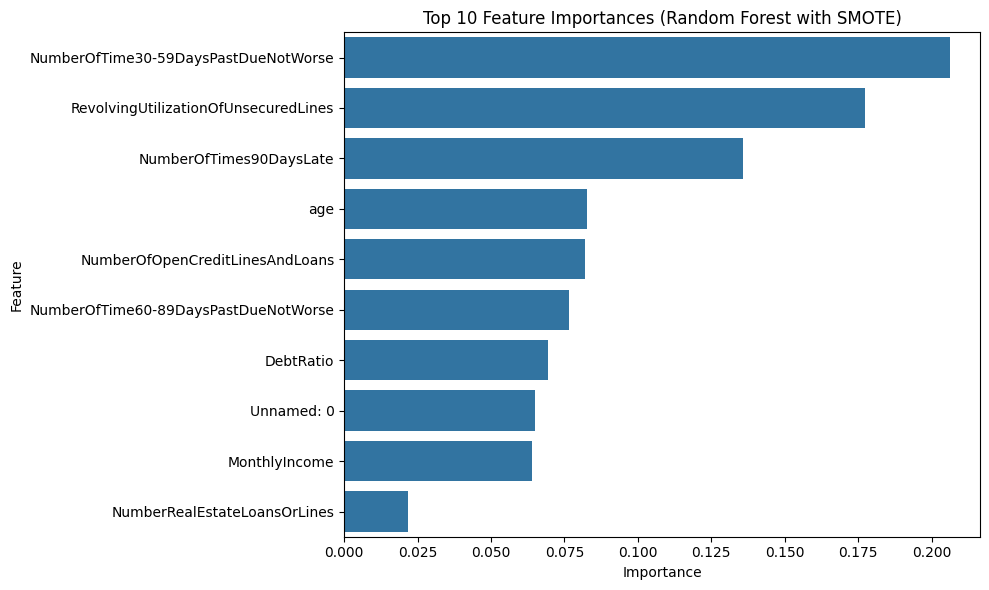

In [27]:
# Feature Importance
# Get feature names from original DataFrame
feature_names = X.columns

# Get feature importances
importances = rf_smote.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest with SMOTE)")
plt.tight_layout()
plt.show()

# Final Summary

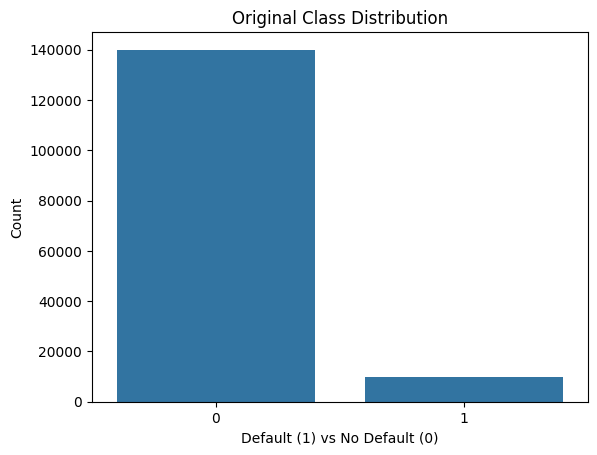

In [28]:
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title("Original Class Distribution")
plt.xlabel("Default (1) vs No Default (0)")
plt.ylabel("Count")
plt.show()

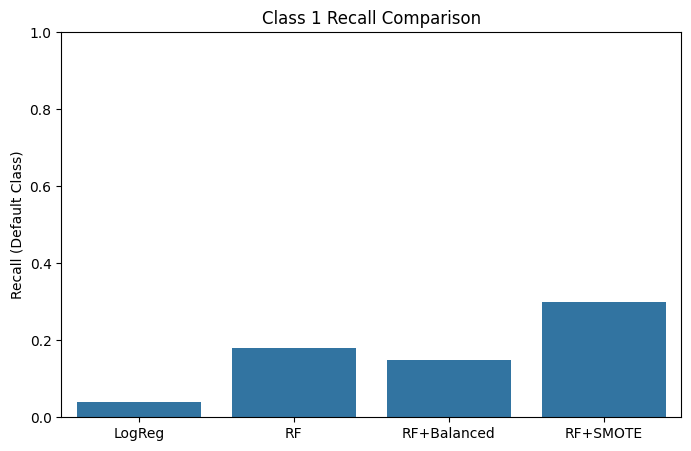

In [29]:
# Model perforamance comparison

models = ['LogReg', 'RF', 'RF+Balanced', 'RF+SMOTE']
recalls = [0.04, 0.18, 0.15, 0.30]  # update based on your real results

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=recalls)
plt.title("Class 1 Recall Comparison")
plt.ylabel("Recall (Default Class)")
plt.ylim(0, 1)
plt.show()

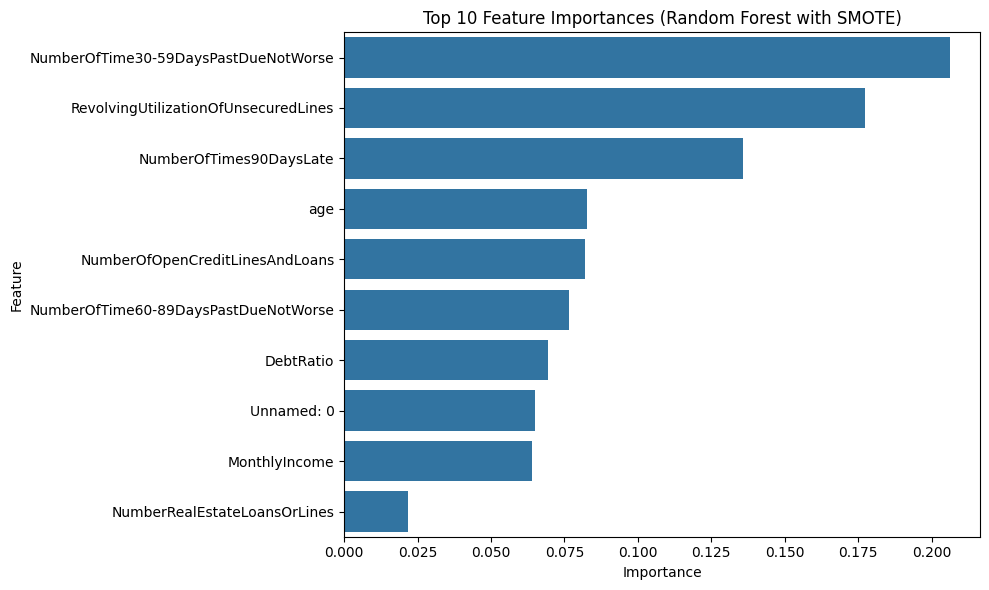

In [30]:
# Top 10 Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest with SMOTE)")
plt.tight_layout()
plt.show()